In [3]:
import cv2
import numpy as np

l_path = 'left_disp.jpeg'
r_path = 'right_disp.jpeg'

image_l = cv2.imread(l_path)
image_r = cv2.imread(r_path)

l = []
height_l = image_l.shape[0]
width_l = image_l.shape[1]
for i in range(height_l):
    for j in range(width_l):
        depth = image_l[i][j] / 255
        length = np.sqrt(np.sum(np.square(depth)))
        l.append([i, j, length])

r = []
height_r = image_r.shape[0]
width_r = image_r.shape[1]
for i in range(height_r):
    for j in range(width_r):
        depth = image_r[i][j] / 255
        length = np.sqrt(np.sum(np.square(depth)))
        r.append([i, j, length])

# example of visualization for point clouds

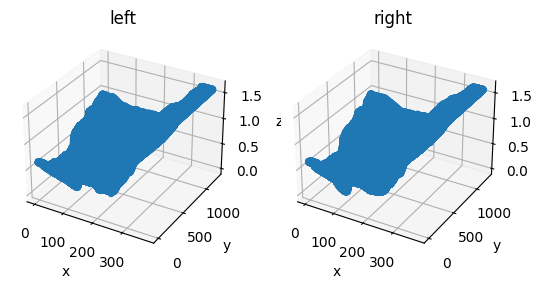

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point1 = l
point2 = r

x1, y1, z1 = zip(*point1)
x2, y2, z2 = zip(*point2)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x1, y1, z1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('left')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(x2, y2, z2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('right')

plt.show()

# example of calculate the Chamfer distance loss

In [9]:
import numpy as np
def array2samples_distance(array1, array2):
    # find the min distance of point1 to all points in array2
    distances = (array2 - point1) * (array2 - point1)
    distances = np.sum(np.min(distances,axis=1))

    return distances

def chamfer_distance(array1, array2):
    dist = 0
    av_dist1 = array2samples_distance(array1, array2)
    av_dist2 = array2samples_distance(array2, array1)
    dist = dist + (av_dist1 + av_dist2)
    return dist

print("the chamfer_distance of left image and the right image = ", chamfer_distance(np.array(l), np.array(r)))

the chamfer_distance of left image and the right image =  3.139009841387053


# example of torch-ngp for depth prior 

In [12]:
!python main_nerf.py nerf_synthetic/road --workspace road -O --bound 1.0 --scale 0.8 --dt_gamma 0

Namespace(path='nerf_synthetic/road', O=True, test=False, workspace='road', seed=0, iters=30000, lr=0.01, ckpt='latest', num_rays=4096, cuda_ray=True, max_steps=1024, num_steps=512, upsample_steps=0, update_extra_interval=16, max_ray_batch=4096, patch_size=1, fp16=True, ff=False, tcnn=False, color_space='srgb', preload=True, bound=1.0, scale=0.8, offset=[0, 0, 0], dt_gamma=0.0, min_near=0.2, density_thresh=10, bg_radius=-1, gui=False, W=1920, H=1080, radius=5, fovy=50, max_spp=64, error_map=False, clip_text='', rand_pose=-1)
NeRFNetwork(
  (encoder): GridEncoder: input_dim=3 num_levels=16 level_dim=2 resolution=16 -> 2048 per_level_scale=1.3819 params=(6119864, 2) gridtype=hash align_corners=False interpolation=linear
  (sigma_net): ModuleList(
    (0): Linear(in_features=32, out_features=64, bias=False)
    (1): Linear(in_features=64, out_features=16, bias=False)
  )
  (encoder_dir): SHEncoder: input_dim=3 degree=4
  (color_net): ModuleList(
    (0): Linear(in_features=31, out_feature

# result of the example of torch-ngp for depth prior 

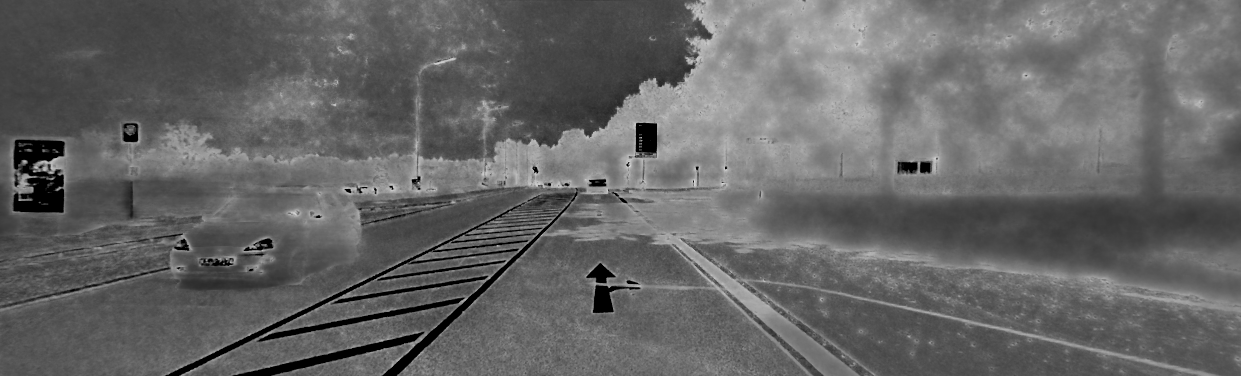

In [16]:
import PIL.Image as Image
image_left_path = '/home/cellverse/Desktop/cv/torch-ngp/road/validation/ngp_ep15000_0001_depth.png'
image_right_path = '/home/cellverse/Desktop/cv/torch-ngp/road/validation/ngp_ep15000_0002_depth.png'

image_left = Image.open(image_left_path)
image_right = Image.open(image_right_path)

image_left

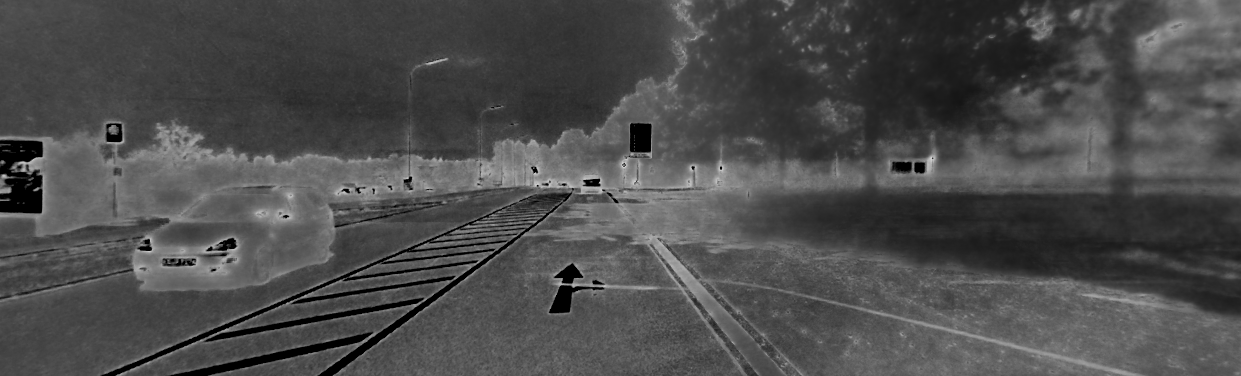

In [15]:
image_right